In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

print("done")

done


In [2]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

categories = [
        # "ctscinet", # no defined genre
        "career_related_policy",
        "working_life",
        "career_profiles",
        # "life_and_career_balance",# no defined genre
        # "myscinet", # no defined genre
        # "issues_and_perspectives", # too much overlap with advice, no defined genre
        "advice"
        ]

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100, bbox_inches="tight")

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", genre="advice")
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

print("done")

done


In [3]:
frequency_filename = "../data/frequency_wordlex.csv"

frequency = pd.read_csv(frequency_filename)
# frequency = pd.DataFrame(frequency)
total = sum(frequency.FREQcount)
print(total)

frequency["proportion"] = frequency["FREQcount"]/total

frequency.head()

49719560


,still,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,proportion
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237,0.030208
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235,0.023262
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234,0.020941
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233,0.042935
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232,0.013733


In [4]:
infile_hedges = "../data/hedges.csv"
infile_boosters = "../data/boosters.csv"

h_list = [word[:-1] for word in open(infile_hedges, "r")][1:]
b_list = [word[:-1] for word in open(infile_boosters, "r")][1:]

print(h_list[:10])
print(b_list[:10])

['about', 'almost', 'apparent', 'apparently', 'appear', 'appeared', 'appears', 'appearing', 'approximately', 'approximate']
['always', 'beyond doubt', 'certain', 'certainly', 'clear', 'clearer', 'clearest', 'clearly', 'conclusively', 'conclusive']


In [5]:
freq_h = 0
freq_b = 0
new_h_list = []
new_b_list = []

count=0

for word in h_list:
    if len(frequency.loc[frequency.still == word])==0:
        continue
    else:
        count+=1
        freq = frequency.loc[frequency.still == word, "FREQcount"].item()
        freq_h+=freq
        new_h_list.append(word)

count=0
for word in b_list:
    if len(frequency.loc[frequency.still == word])==0:
        continue
    else:
        count+=1
        freq = frequency.loc[frequency.still == word, "FREQcount"].item()
        freq_b+=freq
        new_b_list.append(word)

print(len(new_h_list)/len(h_list))
print(len(new_b_list)/len(b_list))

h_list = new_h_list
b_list = new_b_list

exp_h = freq_h/total
exp_b = freq_b/total

print(exp_h)
print(exp_b)

0.7883597883597884
0.6987951807228916
0.020435196932555317
0.006520874279659756


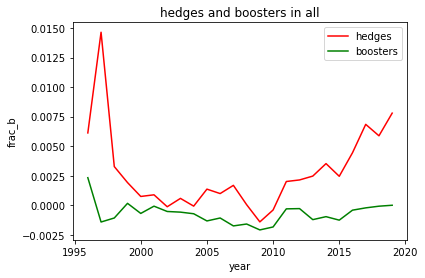

In [6]:
counts_df_h = clh.hedges(full_df, hedges="hedges", inlist=h_list)
counts_df_b = clh.hedges(full_df, hedges="boosters", inlist=b_list)

# print(counts_df_h.head(2))

counts_df_h = counts_df_h.groupby("year").sum()
counts_df_b = counts_df_b.groupby("year").sum()

counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]-exp_h
counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]-exp_b


counts_plot_df_h = counts_df_h.reset_index()
counts_plot_df_b = counts_df_b.reset_index()
# counts_df.head()

sns.lineplot(x="year", y="frac_h", color="red", label="hedges", data=counts_plot_df_h)
sns.lineplot(x="year", y="frac_b", color="green", label="boosters", data=counts_plot_df_b)

plt.title("hedges and boosters in all")
plt.savefig("../figs/hedges_all.png")

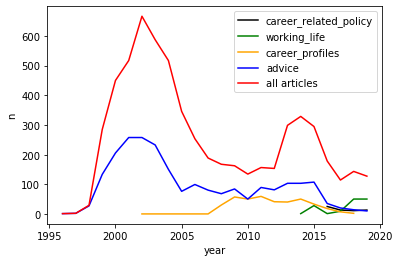

In [7]:
full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

colors = ["black","green","orange","blue","purple","yellow"]
dfs = []
count=0

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    dfs.append(cat_df)
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    # print(cat_vis.head())
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat, data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

In [19]:
# sns.lineplot(x="year", y="frac_h", color="red", label="hedges", data=counts_plot_df_h)

plt.figure(figsize=(12, 8))

sns.lineplot(x="year", y="frac_h", color="red", label="hedges",linewidth=4, data=counts_plot_df_h)


count=0

for df in dfs:
    if categories[count]=="advice":
        counts_df = clh.hedges(df, hedges="hedges")

        counts_df["frac_h"] = counts_df["hedges"]/counts_df["wc"]-exp_h

        counts_plot_df = counts_df.groupby("year").mean()

        counts_plot_df = counts_plot_df.reset_index()

        sns.lineplot(x = "year", y = "frac_h", color = colors[count], label=categories[count],linewidth=2, data=counts_plot_df)
    count+=1
    # print(count)

plt.axhline(y=0, color="gray")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
plt.title("hedges proportion by category", fontsize=24)
output_plot("../figs/hedges_by_category.png")
# plt.savefig("../figs/hedges_by_category.png")

TypeError: output_plot() got an unexpected keyword argument 'bbox_inches'

In [18]:
# sns.lineplot(x="year", y="frac_b", color="red", label="hedges", data=counts_plot_df_b)

plt.figure(figsize=(12, 8))

sns.lineplot(x="year", y="frac_b", color="red", label="all articles",linewidth=4, data=counts_plot_df_b)


count=0

for df in dfs:
    if categories[count]=="advice":

        counts_df = clh.hedges(df, hedges="boosters")

        counts_df["frac_b"] = counts_df["boosters"]/counts_df["wc"]-exp_b

        counts_plot_df = counts_df.groupby("year").mean()

        counts_plot_df = counts_plot_df.reset_index()

        sns.lineplot(x = "year", y = "frac_b", color = colors[count], label=categories[count],linewidth=2, data=counts_plot_df)
    count+=1
    # print(count)


plt.axhline(y=0, color="gray")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
plt.title("boosters proportion by category", fontsize=24)
output_plot("../figs/boosters_by_category.png")
# plt.savefig("../figs/boosters_by_category.png")

TypeError: output_plot() got an unexpected keyword argument 'bbox_inches'

In [16]:
count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.hedges(df, "hedges")
    counts_df["frac_h"] = counts_df["hedges"]/counts_df["wc"]-exp_h
    
    counts_plot_df = counts_df.groupby("year").median()
    counts_plot_df = counts_plot_df.reset_index()
    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac_h",lowess=True, data = counts_plot_df)
    # plt.title("hedges "+categories[count])

    count+=1

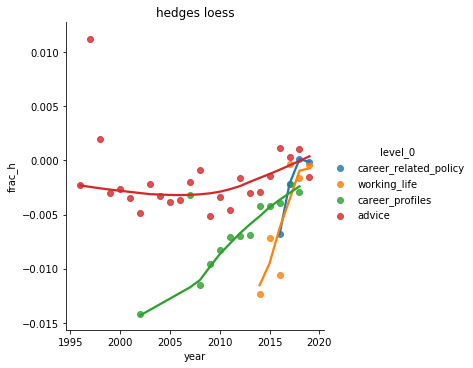

In [18]:
reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# print(reg)


sns.lmplot(x = "year", y = "frac_h",lowess=True, hue="level_0", data = reg)
plt.title("hedges loess")
plt.savefig("../figs/hedges_by_category_loess")

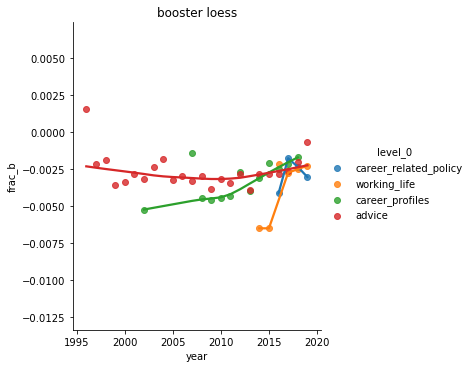

In [20]:
count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.hedges(df, "boosters")
    counts_df["frac_b"] = counts_df["boosters"]/counts_df["wc"]-exp_b
    
    counts_plot_df = counts_df.groupby("year").median()
    counts_plot_df = counts_plot_df.reset_index()
    pieces.append(counts_plot_df)


    # sns.lmplot(x = "year", y = "frac_b",lowess=True, data = counts_plot_df)
    # plt.title("boosters "+categories[count])

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# reg
sns.lmplot(x = "year", y = "frac_b",lowess=True, hue="level_0", data = reg)
plt.title("booster loess")
plt.savefig("../figs/booster_by_category_loess")

In [29]:
# # print(full_df.head())
# counts_df = clh.hedges(full_df, "hedges")

# counts_df = counts_df.groupby("month_seq").sum()
# counts_df["inc"] = counts_df["hedges"]*1000/counts_df["wc"]

# counts_plot_df_all_h = counts_df.reset_index()

# counts_plot_df_all_h["inc_rolling_mean"] = counts_plot_df_all_h.inc.rolling(18).mean() 
# sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = "red", label="full", data=counts_plot_df_all_h)


In [28]:
# # print(full_df.head())
# counts_df = clh.hedges(full_df, "boosters")

# counts_df = counts_df.groupby("month_seq").sum()
# counts_df["inc"] = counts_df["boosters"]*1000/counts_df["wc"]

# counts_plot_df_all_b = counts_df.reset_index()

# counts_plot_df_all_b["inc_rolling_mean"] = counts_plot_df_all_b.inc.rolling(18).mean() 
# sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = "red", label="full", data=counts_plot_df_all_b)

In [23]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = "red", label="full", data=counts_plot_df_all_h)
# count=0


# for df in dfs:
#     counts_df = clh.hedges(df, "hedges")

#     counts_df = counts_df.groupby("month_seq").sum()
#     counts_df["inc"] = counts_df["hedges"]*1000/counts_df["wc"]

#     counts_plot_df = counts_df.reset_index()

#     counts_plot_df["inc_rolling_mean"] = counts_plot_df.inc.rolling(18).mean() 

#     sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = colors[count], label=categories[count], data=counts_plot_df)
#     count+=1

# plt.title("hedges verb incidence by category")
# output_plot("../figs/modal_by_category_month_inc.png")
# # plt.savefig("../figs/modal_by_category.png")

In [24]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = "red", label="full", data=counts_plot_df_all_b)
# count=0


# for df in dfs:
#     counts_df = clh.hedges(df, "boosters")

#     counts_df = counts_df.groupby("month_seq").sum()
#     counts_df["inc"] = counts_df["boosters"]*1000/counts_df["wc"]

#     counts_plot_df = counts_df.reset_index()

#     counts_plot_df["inc_rolling_mean"] = counts_plot_df.inc.rolling(18).mean() 

#     sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = colors[count], label=categories[count], data=counts_plot_df)
#     count+=1

# plt.title("boosters verb incidence by category")
# output_plot("../figs/modal_by_category_month_inc.png")
# # plt.savefig("../figs/modal_by_category.png")

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

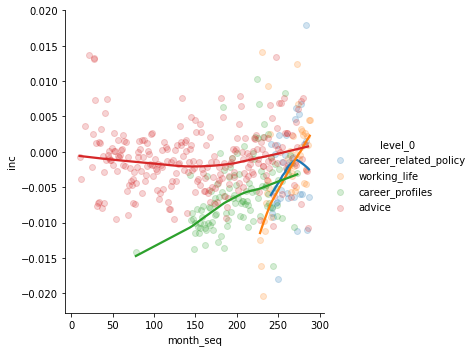

In [27]:
plt.figure(figsize=(12, 8))


count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.hedges(df, "hedges")
    counts_df = counts_df.groupby("month_seq").sum()
    counts_df["inc"] = counts_df["hedges"]/counts_df["wc"]-exp_h
    
    counts_plot_df = counts_df.reset_index()

    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac_m",lowess=True, data = counts_plot_df)
    # plt.title("modals "+categories[count])
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()


output_plot("../figs/hedges_by_category_month_loess")
sns.lmplot(x = "month_seq", y = "inc",lowess=True, hue="level_0",scatter_kws={'alpha':0.2}, data = reg)

In [46]:
#

<Figure size 864x576 with 0 Axes>

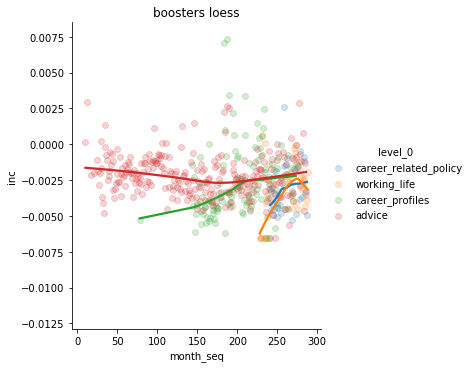

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(12, 8))


count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.hedges(df, "boosters")
    counts_df = counts_df.groupby("month_seq").sum()
    counts_df["inc"] = counts_df["boosters"]/counts_df["wc"]-exp_b
    
    counts_plot_df = counts_df.reset_index()

    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac_m",lowess=True, data = counts_plot_df)
    # plt.title("modals "+categories[count])
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()


sns.lmplot(x = "month_seq", y = "inc",lowess=True, hue="level_0",scatter_kws={'alpha':0.2}, data = reg)
plt.title("boosters loess")
output_plot("../figs/boosters_by_category_month_loess")